In [82]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listings-in-major-us-cities-deloitte-ml/train.csv
/kaggle/input/airbnb-listings-in-major-us-cities-deloitte-ml/test.csv


# Veri Seti

Amerika'daki büyük şehirlerde bulunan AirBnB verilerinden oluşan veri setimizi dataframe olarak "df" ismi ile oluşturuyoruz.

In [83]:
df = pd.read_csv("/kaggle/input/airbnb-listings-in-major-us-cities-deloitte-ml/test.csv")
df.head(10)

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,3895911,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",2,1.0,Real Bed,flexible,True,LA,...,34.028372,-118.494449,Santa Monica Private Bedroom/Bathroom Suite,Santa Monica,6,97.0,https://a0.muscache.com/im/pictures/92355eae-b...,90403,1.0,1.0
1,9710289,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",3,1.0,Real Bed,moderate,True,NYC,...,40.720380,-73.942329,"Bright, charming luxury 1 BR with amazing rooftop",Williamsburg,2,80.0,https://a0.muscache.com/im/pictures/da03e413-d...,11222,1.0,1.0
2,9051635,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1,1.0,Real Bed,moderate,True,SF,...,37.785434,-122.470284,Private room in charming apartment,Richmond District,2,100.0,https://a0.muscache.com/im/pictures/0ba7d8aa-9...,94118,1.0,1.0
3,708374,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",1,1.0,Real Bed,strict,True,LA,...,33.976026,-118.463471,Marina del Rey Beach Jr 1 Bdrm 5,Marina Del Rey,7,94.0,https://a0.muscache.com/im/pictures/30279741/4...,90292,0.0,1.0
4,626296,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,NYC,...,40.735573,-74.005996,Bright Studio Loft Prime Location,West Village,0,NaN,https://a0.muscache.com/im/pictures/9384e262-8...,10014,1.0,1.0
5,3309829,Townhouse,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,2.0,Real Bed,moderate,True,LA,...,34.084835,-118.097186,Private Room +Queen size double bed,NaN,8,98.0,https://a0.muscache.com/im/pictures/e7d19a74-7...,91776,1.0,1.0
6,18964252,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",3,1.0,Real Bed,strict,True,NYC,...,40.856378,-73.930397,New York State of Mind,Washington Heights,6,97.0,https://a0.muscache.com/im/pictures/e604dbab-2...,10040,1.0,2.0
7,14402792,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Hea...",3,1.0,Real Bed,strict,True,NYC,...,40.752039,-73.974419,Incredible Midtown Studio,Midtown East,3,93.0,https://a0.muscache.com/im/pictures/312e12a0-6...,10017,0.0,2.0
8,4120908,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",5,1.0,Real Bed,moderate,True,Boston,...,42.346762,-71.079951,Lux 2 Bedroom in Post-War Back Bay building w/...,Back Bay,15,92.0,https://a0.muscache.com/im/pictures/e81bc2af-f...,02116,2.0,3.0
9,830490,Apartment,Private room,"{""Wireless Internet"",""Air conditioning"",Kitche...",1,1.0,Real Bed,flexible,True,NYC,...,40.765445,-73.984504,Large Bedroom Available near Columbus Circle,Hell's Kitchen,0,NaN,https://a0.muscache.com/im/pictures/57229a7d-6...,10019,1.0,1.0


Veri setindeki verileri anlamak ve sayısal verilerin istatiksel gözlemini yapmak için describe fonksiyonunu çağırıyoruz.

In [84]:
df.describe()

,id,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,2.545800e+04,25458.000000,25379.000000,25458.000000,25458.000000,25458.000000,19741.000000,25430.000000,25412.000000
mean,1.127161e+07,3.150247,1.241479,38.439202,-92.566071,20.836515,94.011550,1.266968,1.715843
std,6.092549e+06,2.116109,0.597722,3.088653,21.712654,38.517971,7.978033,0.841774,1.258478
min,1.090000e+02,1.000000,0.000000,33.339656,-122.509518,0.000000,20.000000,0.000000,0.000000
25%,6.280536e+06,2.000000,1.000000,34.123124,-118.342453,1.000000,91.000000,1.000000,1.000000
50%,1.227358e+07,2.000000,1.000000,40.662063,-77.002100,5.000000,96.000000,1.000000,1.000000
75%,1.641370e+07,4.000000,1.000000,40.745850,-73.954426,23.000000,100.000000,1.000000,2.000000
max,2.123117e+07,16.000000,15.500000,42.396191,-70.988496,489.000000,100.000000,14.000000,40.000000


# VERİ ÖN İŞLEME

Öncelikle veri setinde hangi sütunda kaç tane boş veri olduğunu anlamamız gerekiyor. Bu şekilde ön işleme sürecine adım atıyoruz.

In [85]:
df.isnull().sum()

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   79
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                 14
first_review              5436
host_has_profile_pic        55
host_identity_verified      55
host_response_rate        6306
host_since                  55
instant_bookable             0
last_review               5425
latitude                     0
longitude                    0
name                         5
neighbourhood             2465
number_of_reviews            0
review_scores_rating      5717
thumbnail_url             2859
zipcode                    321
bedrooms                    28
beds                        46
dtype: int64

Belirlediğimiz ve ilk bakışta kullanmayacağımız verileri veri setinden siliyoruz.

In [86]:
columns_to_drop = [
    'id', 'description', 'first_review', 'host_has_profile_pic', 
    'host_identity_verified', 'host_response_rate', 'host_since', 
    'instant_bookable', 'last_review', 'latitude', 'longitude', 
    'name', 'neighbourhood', 'thumbnail_url', 'zipcode'
]

df = df.drop(columns=columns_to_drop)
df

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,number_of_reviews,review_scores_rating,bedrooms,beds
0,Apartment,Private room,"{TV,""Cable TV"",Kitchen,""Free parking on premis...",2,1.0,Real Bed,flexible,True,LA,6,97.0,1.0,1.0
1,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",3,1.0,Real Bed,moderate,True,NYC,2,80.0,1.0,1.0
2,Apartment,Private room,"{""Wireless Internet"",Kitchen,Heating,""Family/k...",1,1.0,Real Bed,moderate,True,SF,2,100.0,1.0,1.0
3,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""W...",1,1.0,Real Bed,strict,True,LA,7,94.0,0.0,1.0
4,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,flexible,True,NYC,0,NaN,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25453,House,Entire home/apt,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",6,2.0,Real Bed,strict,True,SF,8,90.0,3.0,4.0
25454,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",1,2.5,Real Bed,flexible,False,LA,0,NaN,1.0,1.0
25455,House,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,moderate,True,LA,11,95.0,1.0,1.0
25456,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,1.0,Real Bed,moderate,True,NYC,0,NaN,1.0,3.0


Encoding metodu ile sayısal verilere dönüştürmek için kategorik verilere göz gezdiriyoruz.

In [87]:
#Konaklanacak eve ait "Yatak Türü" verisi bizim için önemli olabilir. Bu yüzden bu değişkene ait eşsiz 
#verileri görelim.
df["bed_type"].unique()

array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Airbed', 'Couch'],
      dtype=object)

In [88]:
#Sklearn kütüphanesinde bulunan LabelEncoder fonksiyonu yardımı ile yatak türleri kategorilerini nominal veriye çevireceğiz.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


df['bed_type_encoded'] = label_encoder.fit_transform(df['bed_type'])



/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [89]:
df[['bed_type','bed_type_encoded']].head()

,bed_type,bed_type_encoded
0,Real Bed,4
1,Real Bed,4
2,Real Bed,4
3,Real Bed,4
4,Real Bed,4


Aynı şekilde diğer değişkenleride dönüştüreceğiz.

In [90]:
df.cancellation_policy.unique()

array(['flexible', 'moderate', 'strict', 'super_strict_60',
       'super_strict_30', 'long_term'], dtype=object)

In [91]:
df['cancellation_policy_encoded'] = label_encoder.fit_transform(df['cancellation_policy'])

df[['cancellation_policy', 'cancellation_policy_encoded']].head()

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,cancellation_policy,cancellation_policy_encoded
0,flexible,0
1,moderate,2
2,moderate,2
3,strict,3
4,flexible,0


In [92]:
#Boolean değişkenleri astype yöntemi ile direkt sayısal karşılıklarına atayabiliriz.
df['cleaning_fee_numeric'] = df['cleaning_fee'].astype(int)

df[['cleaning_fee', 'cleaning_fee_numeric']]

,cleaning_fee,cleaning_fee_numeric
0,True,1
1,True,1
2,True,1
3,True,1
4,True,1
...,...,...
25453,True,1
25454,False,0
25455,True,1
25456,True,1


In [93]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [94]:
df['room_type_encoded'] = label_encoder.fit_transform(df['room_type'])
df[['room_type', 'room_type_encoded']]

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,room_type,room_type_encoded
0,Private room,1
1,Entire home/apt,0
2,Private room,1
3,Entire home/apt,0
4,Entire home/apt,0
...,...,...
25453,Entire home/apt,0
25454,Private room,1
25455,Entire home/apt,0
25456,Entire home/apt,0


In [95]:
df.property_type.unique()

array(['Apartment', 'Townhouse', 'House', 'Boutique hotel', 'Loft',
       'Timeshare', 'Condominium', 'Bungalow', 'Guesthouse', 'Other',
       'Guest suite', 'Bed & Breakfast', 'Villa', 'Earth House',
       'Camper/RV', 'Cabin', 'Hostel', 'Serviced apartment',
       'Vacation home', 'Boat', 'In-law', 'Dorm', 'Tipi', 'Treehouse',
       'Castle', 'Cave', 'Yurt', 'Tent', 'Chalet', 'Train'], dtype=object)

In [96]:
df['property_type_encoded'] = label_encoder.fit_transform(df['property_type'])
df[['property_type', 'property_type_encoded']]

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


,property_type,property_type_encoded
0,Apartment,0
1,Apartment,0
2,Apartment,0
3,Apartment,0
4,Apartment,0
...,...,...
25453,House,16
25454,Apartment,0
25455,House,16
25456,Apartment,0


In [97]:
#Eski verileri veri setinden çıkarıyoruz.
columns_to_drop = [
    'amenities',         # Özellik sütunu
    'cleaning_fee',      # Temizlik ücreti sütunu
    'cancellation_policy', # İptal politikası sütunu
    'room_type',         # Oda tipi sütunu
    'property_type',      # Mülk tipi sütunu
    'bed_type',
    'city'
]

df_cleaned = df.drop(columns=columns_to_drop)
df_cleaned.head()

,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,bed_type_encoded,cancellation_policy_encoded,cleaning_fee_numeric,room_type_encoded,property_type_encoded
0,2,1.0,6,97.0,1.0,1.0,4,0,1,1,0
1,3,1.0,2,80.0,1.0,1.0,4,2,1,0,0
2,1,1.0,2,100.0,1.0,1.0,4,2,1,1,0
3,1,1.0,7,94.0,0.0,1.0,4,3,1,0,0
4,2,1.0,0,NaN,1.0,1.0,4,0,1,0,0


In [98]:
#temizlenmiş dataframe'i data olarak yeniden ele alıyoruz.
data = df_cleaned
data.describe()

,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,bed_type_encoded,cancellation_policy_encoded,cleaning_fee_numeric,room_type_encoded,property_type_encoded
count,25458.000000,25379.000000,25458.000000,19741.000000,25430.000000,25412.000000,25458.000000,25458.000000,25458.00000,25458.000000,25458.000000
mean,3.150247,1.241479,20.836515,94.011550,1.266968,1.715843,3.938133,1.821549,0.73635,0.476392,5.335808
std,2.116109,0.597722,38.517971,7.978033,0.841774,1.258478,0.416852,1.286300,0.44062,0.561786,7.748360
min,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,91.000000,1.000000,1.000000,4.000000,0.000000,0.00000,0.000000,0.000000
50%,2.000000,1.000000,5.000000,96.000000,1.000000,1.000000,4.000000,2.000000,1.00000,0.000000,0.000000
75%,4.000000,1.000000,23.000000,100.000000,1.000000,2.000000,4.000000,3.000000,1.00000,1.000000,16.000000
max,16.000000,15.500000,489.000000,100.000000,14.000000,40.000000,4.000000,5.000000,1.00000,2.000000,29.000000


Sayısal verilerin istatiksel değerlerini görerek daha fazla veriye ulaşmış olduk.

In [99]:
data.isnull().sum()

accommodates                      0
bathrooms                        79
number_of_reviews                 0
review_scores_rating           5717
bedrooms                         28
beds                             46
bed_type_encoded                  0
cancellation_policy_encoded       0
cleaning_fee_numeric              0
room_type_encoded                 0
property_type_encoded             0
dtype: int64

Eksik verileri olan değişkenleri kullanmak istiyoruz. Bu yüzden boş verileri doldurmamamız gerekecek. Fillna yöntemi null verileri doldurmamıza yarayacak. nominal veya kategorik değişkenler için Medyan en doğru yol olacaktır. Boolean veriler için default olarak False belirliyoruz.

In [100]:
# Eksik verileri medyan ile dolduruyoruz
data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
data['review_scores_rating'].fillna(data['review_scores_rating'].median(), inplace=True)
data['bedrooms'].fillna(data['bedrooms'].median(), inplace=True)
data['beds'].fillna(data['beds'].median(), inplace=True)
data['cleaning_fee_numeric'].fillna(0, inplace=True)


/tmp/ipykernel_35/1104967980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bathrooms'].fillna(data['bathrooms'].median(), inplace=True)
/tmp/ipykernel_35/1104967980.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [101]:
#Artık tüm veriler eksiksiz.
data.isnull().sum()

accommodates                   0
bathrooms                      0
number_of_reviews              0
review_scores_rating           0
bedrooms                       0
beds                           0
bed_type_encoded               0
cancellation_policy_encoded    0
cleaning_fee_numeric           0
room_type_encoded              0
property_type_encoded          0
dtype: int64

In [102]:
data

,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,bed_type_encoded,cancellation_policy_encoded,cleaning_fee_numeric,room_type_encoded,property_type_encoded
0,2,1.0,6,97.0,1.0,1.0,4,0,1,1,0
1,3,1.0,2,80.0,1.0,1.0,4,2,1,0,0
2,1,1.0,2,100.0,1.0,1.0,4,2,1,1,0
3,1,1.0,7,94.0,0.0,1.0,4,3,1,0,0
4,2,1.0,0,96.0,1.0,1.0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25453,6,2.0,8,90.0,3.0,4.0,4,3,1,0,16
25454,1,2.5,0,96.0,1.0,1.0,4,0,0,1,0
25455,2,1.0,11,95.0,1.0,1.0,4,2,1,0,16
25456,4,1.0,0,96.0,1.0,3.0,4,2,1,0,0


# Ayrık veriler (IQR Methodu)

verilerin doğru ölçekte olması bizim asıl isteğimiz. Fakat bazı veriler doğrusallığı bozabilir bunun sebebi ayrık verileri içermeleridir. Ayrık veri olup olmadığını anlama için Boxplot yöntemini kullanabiliriz.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_scores_rating'>

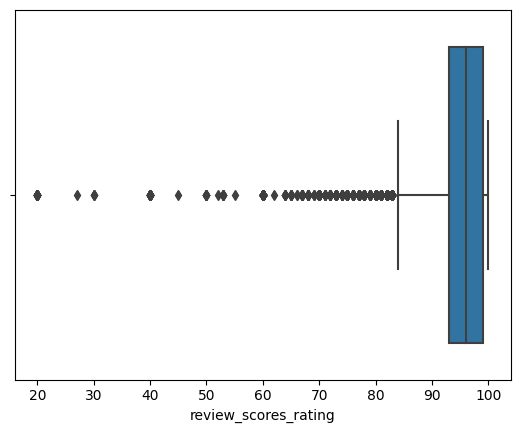

In [103]:
import seaborn as sns
#ilk başta tahminlemek istediğimiz veri AirBnB'lere ait değerlendirme oranları. 
sns.boxplot(x=data["review_scores_rating"])

Çok fazla outlier mevcut ve bunları düzenlememiz gerekiyor. Bunun için yaygın kullanılan IQR(interquantile) fonksiyonunu kullanacağız..

In [104]:
# Ayrık verileri düzenleme fonksiyonu
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = df[column].clip(lower_bound, upper_bound)

remove_outliers_iqr(data, "review_scores_rating")


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='review_scores_rating'>

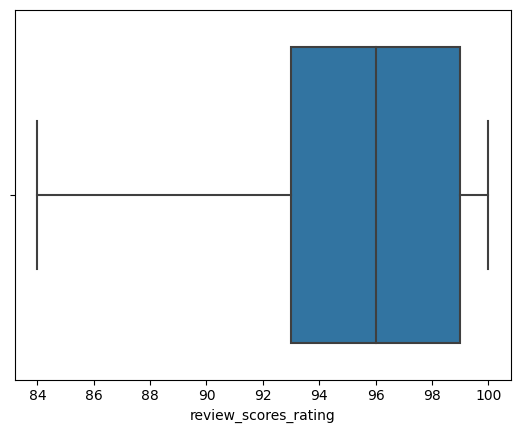

In [105]:

sns.boxplot(x=data["review_scores_rating"])

Gözetimli ve Gözetimsiz öğrenmede algoritma seçimi öncesi hangi verileri kullanacağımızı belirlemek çok önemli. Bunun için değişkenlerin birbirleri ile olan ilişkilerine bakmamız gerekmektedir. Korelasyon; iki değişken arasındaki ilişkiyi bize gösterir ve korelasyon matrisi ise veri seti içerisinde her bir değişkenin birbiri ile olan ilişkiyi gösterir.

In [106]:
data

,accommodates,bathrooms,number_of_reviews,review_scores_rating,bedrooms,beds,bed_type_encoded,cancellation_policy_encoded,cleaning_fee_numeric,room_type_encoded,property_type_encoded
0,2,1.0,6,97.0,1.0,1.0,4,0,1,1,0
1,3,1.0,2,84.0,1.0,1.0,4,2,1,0,0
2,1,1.0,2,100.0,1.0,1.0,4,2,1,1,0
3,1,1.0,7,94.0,0.0,1.0,4,3,1,0,0
4,2,1.0,0,96.0,1.0,1.0,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
25453,6,2.0,8,90.0,3.0,4.0,4,3,1,0,16
25454,1,2.5,0,96.0,1.0,1.0,4,0,0,1,0
25455,2,1.0,11,95.0,1.0,1.0,4,2,1,0,16
25456,4,1.0,0,96.0,1.0,3.0,4,2,1,0,0


accommodates                   1.000000
beds                           0.793607
bedrooms                       0.708635
bathrooms                      0.468267
cancellation_policy_encoded    0.195411
cleaning_fee_numeric           0.185349
property_type_encoded          0.163642
bed_type_encoded               0.072081
number_of_reviews              0.043336
review_scores_rating          -0.032880
room_type_encoded             -0.466843
Name: accommodates, dtype: float64


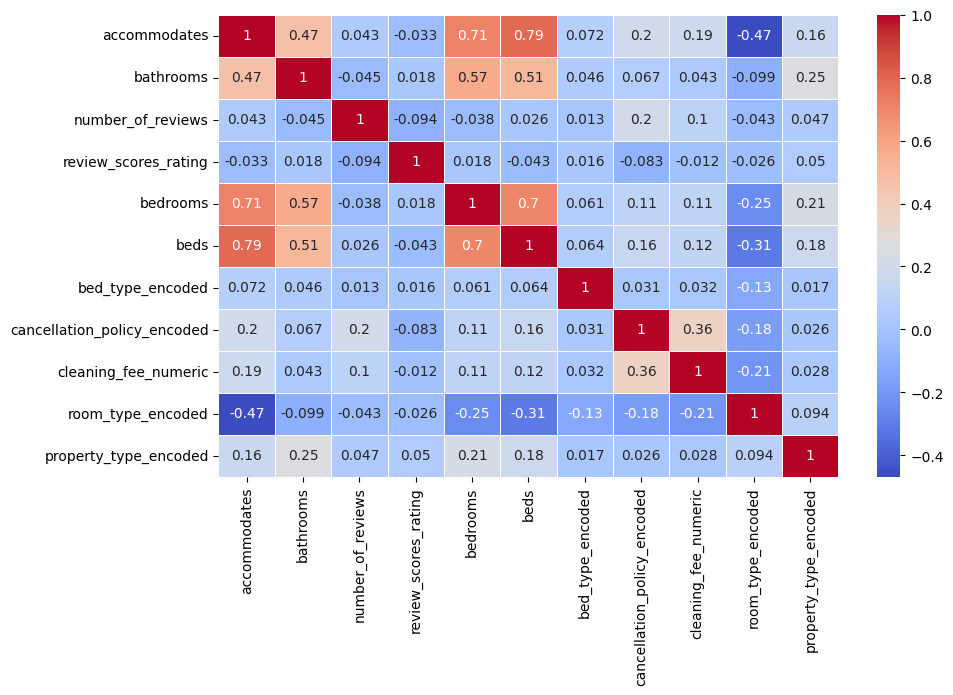

In [107]:
import matplotlib.pyplot as plt

corr_matrix = data.corr()

corr_with_target = corr_matrix['accommodates'].sort_values(ascending=False)
print(corr_with_target)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


Anlaşılan değerlendirme skorları verimiz bizim için uygun gözükmüyor. Bu sebeple tahmin modelide başarısız sonuç verecektir.

Accommodates değişkeni 3 adet sütün ile yüksek ilişkili olduğu için modelde kullanılabilir

In [108]:
data[['accommodates']]

,accommodates
0,2
1,3
2,1
3,1
4,2
...,...
25453,6
25454,1
25455,2
25456,4


# Algoritma eğitme ve model oluşturma

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension

Logistic Regression:
  Mean R-squared: 0.6470
  Standard Deviation: 0.0222
Naive Bayes:
  Mean R-squared: 0.5903
  Standard Deviation: 0.0444
Decision Tree:
  Mean R-squared: 0.7018
  Standard Deviation: 0.0236
Random Forest:
  Mean R-squared: 0.7106
  Standard Deviation: 0.0189


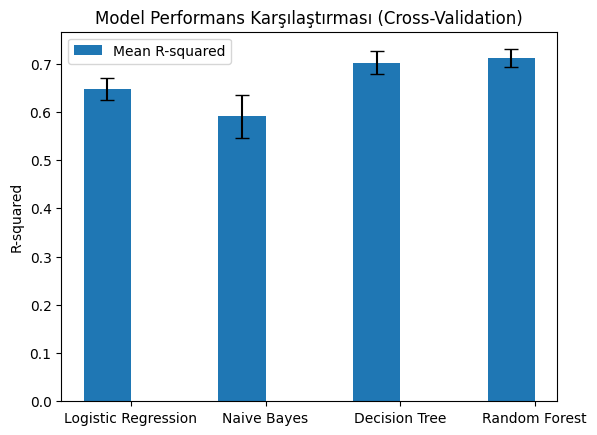

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


X = data[['bathrooms', 'beds', 'bedrooms']]
y = data['accommodates']

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

results = {}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')  # 'r2' skor kullanarak çapraz doğrulama
    results[name] = scores

for name, scores in results.items():
    print(f"{name}:")
    print(f"  Mean R-squared: {np.mean(scores):.4f}")
    print(f"  Standard Deviation: {np.std(scores):.4f}")

names = list(results.keys())
mean_scores = [np.mean(results[name]) for name in names]
std_devs = [np.std(results[name]) for name in names]

x = np.arange(len(names))  # x konumları
width = 0.35  

fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, mean_scores, width, yerr=std_devs, capsize=5, label='Mean R-squared')
ax.set_ylabel('R-squared')
ax.set_title('Model Performans Karşılaştırması (Cross-Validation)')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

plt.show()


# 